In [11]:
import numpy as np
from scipy.stats import norm
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

%matplotlib inline

# Render figures with LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Set figure size
plt.rcParams['figure.figsize'] = (7.0, 5.0)

## Energy Relations in the Optical Cavity

#### Parameters:
- $\alpha_0$ absorption coefficient for internal losses
- $k_0$ wavevector of incident light
- $d$ cavity lenght
- $r_i, t_i\, (i=1,2)$ mirror reflectance and transmitance, respectively
- $\phi(\omega) = \omega_L \frac{2d}{c}+\cos^{-1}\left(\pm\sqrt{g_1 g_2}\right)$


- $g_i=1-d/C_i$ where $C_i$ is the curvature radius of the mirror.

In the following
$$
\Delta = \omega_L - \omega_0 \quad \rightarrow \quad \omega_L=\Delta+\omega_0 
$$
where $\omega_0$ is the frequency of $5^2 S_{1/2} \rightarrow  5^2 P_{3/2}$ transition $\left(384.230 484 468 5(62) \,\mathrm{THz}\right)$

$\newcommand{grt}{g_\mathrm{rt}}$
$\newcommand{mrm}[1]{\mathrm{#1}}$

### Passive lossy optical cavity

The round–trip optical path contains material with voltage absorption coefficient $\alpha_0$, the attenuation of the signal amplitude or signal voltage in one round–trip is $\exp(-2\alpha_0)$.

The net round–trip transmission factor, or *complex round–trip gain*, is
\begin{equation}
g_\mathrm{rt}(\omega_\mathrm{L}) \equiv r_1 r_2 \times \exp[-2\alpha_0-\mathrm{i}\phi(\omega_\mathrm{L})] .
\end{equation}

In the foregoing we consider the resonance condition $\phi(\omega)=0 \rightarrow g_\mathrm{rt} = r_1 r_2 \times \exp[-2\alpha_0]$.

####  Mirror reflectivities and Finesse $\mathcal{F}$ for matched–input condition

Matched input: $r_1^2 = g_\mathrm{rt}\rightarrow r_1 = r_2\exp[-2\alpha_0]$

Finesse: $\mathcal{F} = \pi \sqrt{g_\mathrm{rt}} \big/ (1-g_\mathrm{rt})$

In [12]:
# Round-trip loss
alpha = np.linspace(0,0.1,1000,endpoint=True)

# R2 = 0.99999
r2 = np.sqrt(0.99999)
r1_99999 = r2*np.exp(-2*alpha)  # matched input condition
F_99999 = np.pi*np.sqrt(r1_99999*r2*np.exp(-2*alpha))/(1-r1_99999*r2*np.exp(-2*alpha))    # Finesse

# R2 = 0.99
r2 = np.sqrt(0.99)
r1_99 = r2*np.exp(-2*alpha)     # matched input condition
F_99 = np.pi*np.sqrt(r1_99*r2*np.exp(-2*alpha))/(1-r1_99*r2*np.exp(-2*alpha))    # Finesse

# R2 = 0.95
r2 = np.sqrt(0.95)
r1_95 = r2*np.exp(-2*alpha)     # matched input condition
F_95 = np.pi*np.sqrt(r1_95*r2*np.exp(-2*alpha))/(1-r1_95*r2*np.exp(-2*alpha))    # Finesse

# R2 = 0.9
r2 = np.sqrt(0.90)
r1_9 = r2*np.exp(-2*alpha)     # matched input condition
F_9 = np.pi*np.sqrt(r1_9*r2*np.exp(-2*alpha))/(1-r1_9*r2*np.exp(-alpha))        # Finesse

[0, 0.2, 0, 50]

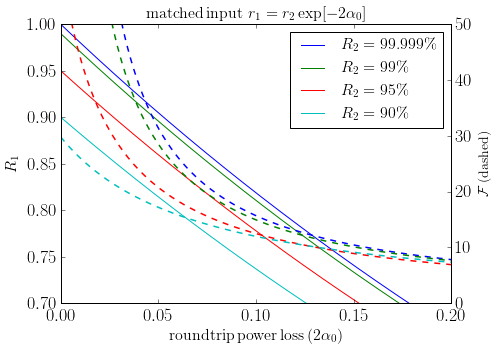

In [18]:
# Plot

fig, ax1 = plt.subplots()
ax1.plot(2*alpha,r1_99999**2,label=r'$R_2=99.999\%$')
ax1.plot(2*alpha,r1_99**2,label=r'$R_2=99\%$')
ax1.plot(2*alpha,r1_95**2,label=r'$R_2=95\%$')
ax1.plot(2*alpha,r1_9**2,label=r'$R_2=90\%$')
ax1.set_xlabel(r'$\mathrm{roundtrip\, power\, loss\,(2\alpha_0)}$', fontsize=16)
ax1.set_ylabel(r'$R_1$', fontsize=16)
plt.title(r'$\mathrm{matched\, input}\,\,r_1 = r_2\exp[-2\alpha_0]$', fontsize=16)
ax1.legend(fontsize=16)
ax1.axis([0,0.2,0.7,1])
for tl in ax1.get_yticklabels():
    tl.set_fontsize(18)
for tl in ax1.get_xticklabels():
    tl.set_fontsize(18)
    
ax2 = ax1.twinx()
plt.plot(2*alpha,F_99999,'--',lw=1.5)
plt.plot(2*alpha,F_99,'--',lw=1.5)
plt.plot(2*alpha,F_95,'--',lw=1.5)
plt.plot(2*alpha,F_9,'--',lw=1.5)
ax2.set_ylabel(r'$\mathcal{F}\, \mathrm{(dashed)}$', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_fontsize(18)
ax2.axis([0,0.2,0,50])

#plt.savefig('finesse.png')

Let the fraction of the *transmitted power* and the *circulating power after one round–trip* be
$$
\eta \equiv \frac{I_\mathrm{T}}{I_\mathrm{C}\mathrm{e}^{-4\alpha_0}} \leq 1.
$$

This will set the
- *transmittivity of the outcoupling mirror* $M_2$ as $t_2^2 = \eta$,
- *round–trip gain* $\grt = r_1\sqrt{1-\eta}e^{-2\alpha_0}$,
- *normalized transmitted power* $I_\mrm{T}\big/I_\mrm{0} = t_1^2\eta\big/ (1-\grt^2)$
- *Finesse* $\mathcal{F}=\pi\sqrt{\grt}\big/(1-\grt)$

in terms of $\eta$ and $r_1$

In [60]:
# fraction of the transmitted power and the circulating power after one round–trip
eta = 0.5

In [61]:
# Normalized transmitted power
def Itrans(alpha, R1, eta):
    grt = np.sqrt(R1)*np.sqrt(1-eta)*np.exp(-2*alpha)
    t1 = np.sqrt(1-R1)
    return eta*(t1/(1-grt))**2

# Finesse
def finesse(alpha, R1, eta):
    grt = np.sqrt(R1)*np.sqrt(1-eta)*np.exp(-2*alpha)
    return np.pi*np.sqrt(grt)/(1-grt)

# Round-trip loss
alpha = np.linspace(0,0.1,1000,endpoint=True)
# In-coupling mirror reflectivity
R1 = np.linspace(0.,1,1000,endpoint=False)

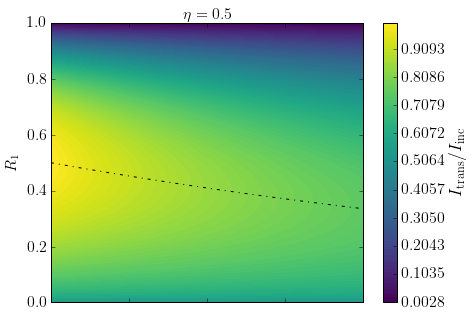

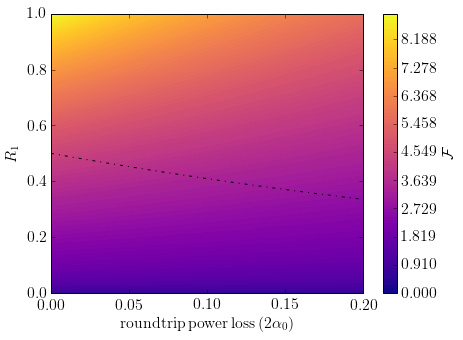

In [62]:
# Plotting

X,Y = np.meshgrid(alpha, R1)

Z1 = Itrans(X, Y, eta)
Z2 = finesse(X, Y, eta)

plt.figure()
plt.contourf(2*X,Y,Z1,levels=np.linspace(Z1.min(),Z1.max(),100),cmap=plt.cm.viridis)
ax1.set_xlabel(r'$\mathrm{round-trip\, power\, loss\,(2\alpha_0)}$', fontsize=16)
plt.ylabel(r'$R_1$', fontsize=16)
plt.title('$\eta = '+str(eta)+'$', fontsize=16)
plt.tick_params(labelsize=16,labelbottom=False)
cbar = plt.colorbar()
cbar.set_label(label=r'$I_\mathrm{trans}/I_\mathrm{inc}$',size=18)
cbar.ax.tick_params(labelsize=16) 
InputMatched = (1-eta)*np.exp(-4*alpha)
plt.plot(2*alpha,InputMatched,'k-.')

plt.figure()
plt.contourf(2*X,Y,Z2,levels=np.linspace(Z2.min(),Z2.max(),100),cmap=plt.cm.plasma)
plt.xlabel(r'$\mathrm{roundtrip\, power\, loss\,(2\alpha_0)}$', fontsize=16)
plt.ylabel(r'$R_1$', fontsize=16)
plt.tick_params(labelsize=16)
cbar = plt.colorbar()
cbar.set_label(label=r'$\mathcal{F}$',size=16)
cbar.ax.tick_params(labelsize=16) 
plt.plot(2*alpha,InputMatched,'k-.')

for a particular value of the *round–trip loss*

In [63]:
# round-trip power loss
alpha = 0.02

In [64]:
R1 = np.linspace(0,1,1000)

grt = np.sqrt( R1*(1-eta) )*np.exp(-2*alpha)
trans = ((1 - R1)*eta)/(1-grt)**2
finesse = np.pi*np.sqrt(grt)/(1-grt)

Rmatched = (1-eta)*np.exp(-4*alpha)

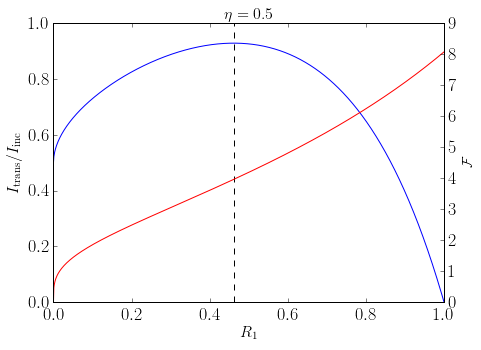

In [65]:
fig, ax1 = plt.subplots()
ax1.plot(R1,trans)
ax1.set_xlabel(r'$R_1$', fontsize=16)
ax1.set_ylabel(r'$I_\mathrm{trans}/I_\mathrm{inc}$', fontsize=16)
ax1.set_title(r'$\eta='+str(eta)+'$', fontsize=16)
#ax1.axis([0,1,0.,0.5])
plt.axvline(Rmatched,color='k',ls='dashed')
for tl in ax1.get_yticklabels():
    tl.set_fontsize(18)
for tl in ax1.get_xticklabels():
    tl.set_fontsize(18)
    
ax2 = ax1.twinx()
plt.plot(R1,finesse,'r-')
ax2.set_ylabel(r'$\mathcal{F}$', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_fontsize(18)
#ax2.axis([0,1,0,25])

The nomalized *scattered power* is defined as
$$
\frac{I_\mrm{scat}}{I_0} \equiv 1-\frac{I_\mrm{circ}e^{-4\alpha_0}}{I_0}.
$$

Let $\chi$ be the ratio of the *scattered* and *transmitted power*
$$
\chi \equiv \frac{I_\mrm{scat}}{I_\mrm{trans}}\quad \rightarrow \quad \frac{1}{t_2^2}\left[ \left( \frac{1-\grt}{t_1 e^{2\alpha_0}}\right)^2-1\right] = \chi
$$

This will set the
- *transmittivity (reflectivity) of the in– and out–coupling mirror*,
- everything else in term of the above.

Solving, $R_1$ in terms of $R_2$ and $\chi$ is
$$
R_1=\frac{e^{4 \alpha } ((R_2-1) \chi -1)+e^{8 \alpha } R_2 (-R_2 \chi +\chi +1)\pm 2 \sqrt{e^{12 \alpha } R_2 ((R_2-1) \chi -1) \left(e^{4 \alpha }-e^{8 \alpha } R_2+(R_2-1) \chi -1\right)}+e^{12 \alpha } R_2+((R_2-1) \chi -1)^2}{\left(e^{8 \alpha } R_2-R_2 \chi +\chi +1\right)^2}
$$

In [66]:
alpha = 0.02
chi = 0.5

R1 = np.linspace(0.0,1,1000,endpoint=False)
R2 = np.linspace(0.0,1,1000,endpoint=False)

R1_chi_p = (np.exp(12*alpha)*R2+np.exp(4*alpha)*(-1+(-1+R2)*chi)+(-1+(-1+R2)*chi)**2+2*np.sqrt(np.exp(12*alpha)*R2*(-1+(-1+R2)*chi)*(-1+np.exp(4*alpha)-np.exp(8*alpha)*R2+(-1+R2)*chi))+np.exp(8*alpha)*R2*(1+chi-R2*chi))/(1+np.exp(8*alpha)*R2+chi-R2*chi)**2
R1_chi_m = (np.exp(12*alpha)*R2+np.exp(4*alpha)*(-1+(-1+R2)*chi)+(-1+(-1+R2)*chi)**2-2*np.sqrt(np.exp(12*alpha)*R2*(-1+(-1+R2)*chi)*(-1+np.exp(4*alpha)-np.exp(8*alpha)*R2+(-1+R2)*chi))+np.exp(8*alpha)*R2*(1+chi-R2*chi))/(1+np.exp(8*alpha)*R2+chi-R2*chi)**2

grt_p = np.sqrt(R1_chi_p*R2)*np.exp(-alpha)
grt_m = np.sqrt(R1_chi_m*R2)*np.exp(-alpha)
finesse_p = np.pi*np.sqrt(grt_p)/(1-grt_p)
finesse_m = np.pi*np.sqrt(grt_m)/(1-grt_m)

[0, 1, 0, 30]

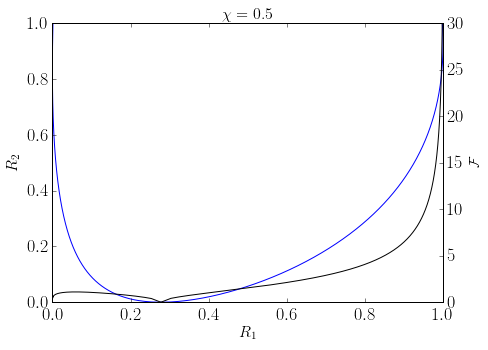

In [67]:
fig, ax1 = plt.subplots()
ax1.plot(R1_chi_p,R2,'b')
ax1.plot(R1_chi_m,R2,'b')
ax1.set_xlabel(r'$R_1$', fontsize=16)
ax1.set_ylabel(r'$R_2$', fontsize=16)
plt.title(r'$\chi='+str(chi)+'$', fontsize=16)
ax1.axis([0,1,0,1])
for tl in ax1.get_yticklabels():
    tl.set_fontsize(18)
for tl in ax1.get_xticklabels():
    tl.set_fontsize(18)
    
ax2 = ax1.twinx()
plt.plot(R1_chi_p,finesse_p,'k-')
plt.plot(R1_chi_m,finesse_m,'k-')
ax2.set_ylabel(r'$\mathcal{F}$', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_fontsize(18)
ax2.axis([0,1,0,30])